## GRIP : THE SPARKS FOUNDATION

## DATA SCIENCE AND BUSINESS ANALYTICS INTERN 

## NAME : AAFTAB SHAIKH

## TASK 2 PREDICTION USING UNSUPERVISED ML 

importing libs

In [86]:
import pandas as pd
import numpy  as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns


from warnings import filterwarnings
filterwarnings('ignore')

In [50]:
#reading data
df = pd.read_csv('Iris.csv')

In [51]:
df.drop(columns='Id',axis=1,inplace=True)

In [104]:
#statistics of data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# lets see data distribution

In [113]:
dist=df.iloc[:,[0,1,2,3]]

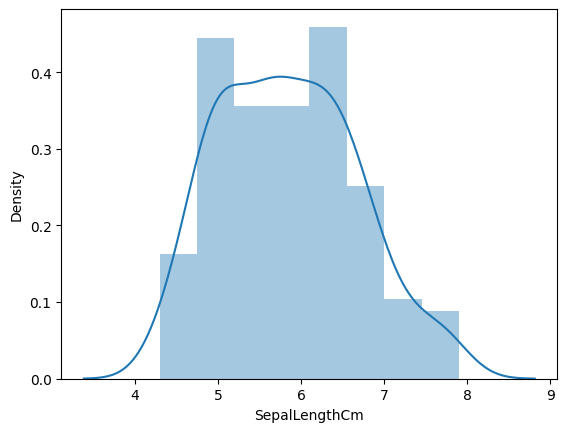

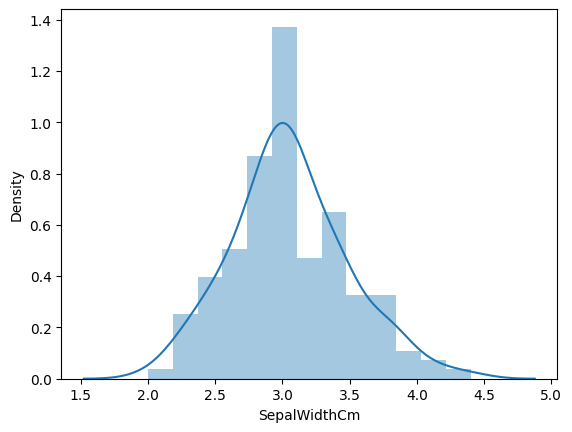

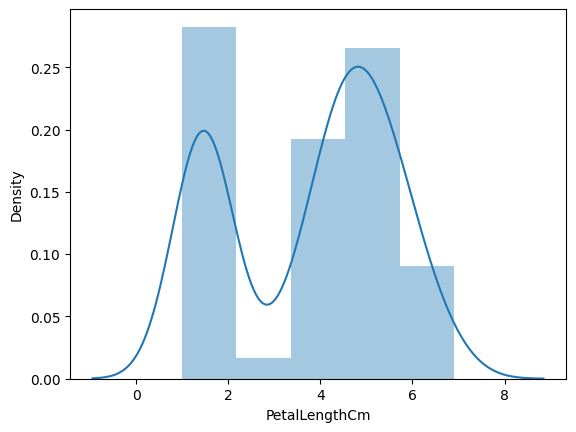

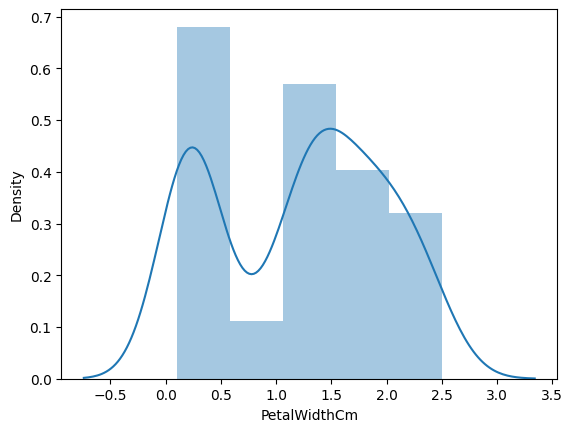

In [99]:
for col in dist.columns:
    sns.distplot(df[col])
    plt.show()

# last two not follow the Gaussian Distribution

# lets see the outliers

In [108]:
for col in dist.columns:
    fig=px.box(df[col])
    fig.show()

# sepal width has some outliers

# Small EDA by barplot

In [112]:
px.histogram(dist,color=df['Species'],)

# Now lets check the clusters that is provided by data 

In [53]:
fig=px.scatter_3d(df,x='SepalLengthCm',y='SepalWidthCm',z='PetalWidthCm',color='Species',size='PetalLengthCm')
fig.show()

# we have 3 clusters 

importing KMeans Clustering for further operation

In [54]:
from sklearn.cluster import KMeans

In [55]:
x=df.iloc[:,[0,1,2,3]]

lets check for elbow method for best clusters

In [56]:
wcss = []

In [57]:
for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)

In [58]:
px.line(wcss)

best cluster is no 3

In [59]:
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.56163015873016,
 38.930963049671746,
 34.62085338680927,
 29.887696448288555,
 27.84087360446571]

# now fitting and predicting the x into kmeans algoa

In [60]:
Kmeans_clus = KMeans(n_clusters = 3)
y_kmeans = Kmeans_clus.fit_predict(x)

In [61]:
Kmeans_clus.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [62]:
Kmeans_clus.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

# need to change the x to numpy array for scatterplot otherwise its show an error

In [63]:
x=np.array(x)

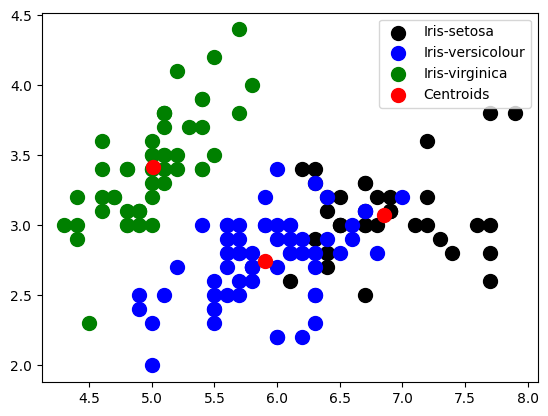

In [64]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'black', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(Kmeans_clus.cluster_centers_[:, 0], Kmeans_clus.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend()

# Now lets see this visualisation in 3d to batter understanding of algo

In [66]:
centroids=Kmeans_clus.cluster_centers_

In [67]:
fig.add_trace(go.Scatter3d(x=centroids[:,0], y=centroids[:,1], z=centroids[:,2],  text="Centroid", mode='markers', marker=dict(size=5, color='black')))
